In [ ]:
import pandas as pd 
import numpy as np
import pandasql as ps
import os
from preprocess_days_stats import preprocess_cumulative_stats, preprocess_match_days
import warnings
# Ignora tutti i warning temporaneamente
warnings.filterwarnings("ignore")

df_giornate = preprocess_match_days(r"c:\Users\Hp\Documents\Serie_A\csv_serie_a")
df_Serie_A_5days = preprocess_cumulative_stats(dataframe=df_giornate)

# Vediamo quanto giocare in casa influisce sulla vittoria

In [2]:
df_Serie_A_5days.head()

,div,giornata,stagione,date,hometeam,awayteam,home_total_points,home_result,home_result_1,home_result_2,...,home_last_5_days_yellows,away_yellow,away_last5_days_yellows,home_red,home_last_5_days_reds,away_red,away_last5_days_reds,home_win_odds,draw_odds,away_win_odds
0,I1,1,2005/2006,2005-08-27,Fiorentina,Sampdoria,0.0,W,###,###,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.20,2.87,3.25
1,I1,1,2005/2006,2005-08-27,Livorno,Lecce,0.0,W,###,###,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.90,2.90,4.00
2,I1,1,2005/2006,2005-08-28,Ascoli,Milan,0.0,D,###,###,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.50,3.75,1.40
3,I1,1,2005/2006,2005-08-28,Inter,Treviso,0.0,W,###,###,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.16,5.50,13.00
4,I1,1,2005/2006,2005-08-28,Juventus,Chievo,0.0,W,###,###,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.25,5.00,13.00


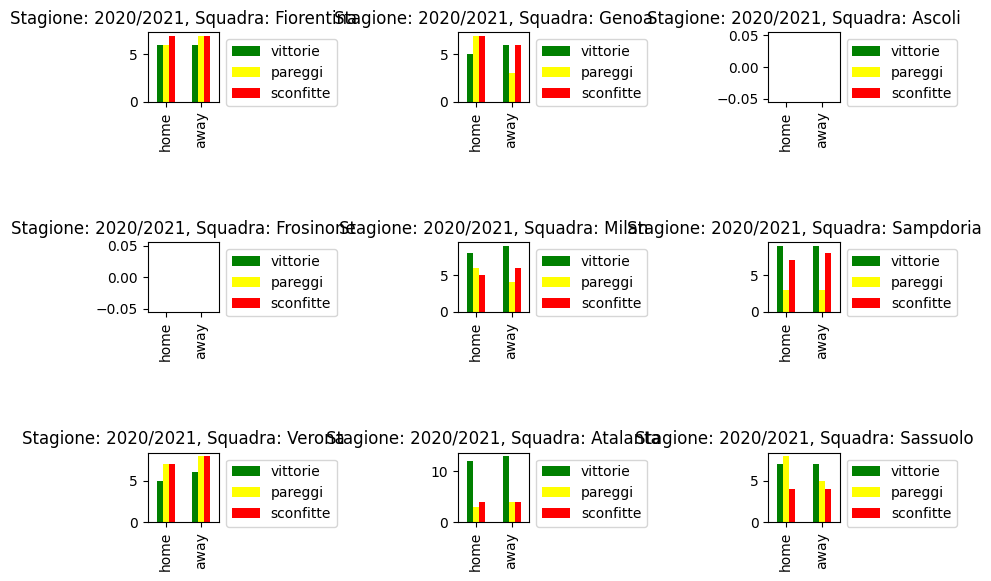

In [21]:
import random
import matplotlib.pyplot as plt
df_win_loss = df_Serie_A_5days[['stagione','hometeam','awayteam','home_result']]

fig, axs = plt.subplots(3, 3, figsize=(14, 14))

stagione = random.choice(df_Serie_A_5days['stagione'])
df_win_loss = df_win_loss[df_win_loss['stagione']==stagione]

for i in range(3):
    for j in range(3):
        squadra = random.choice(df_win_loss['hometeam'])
        df_squadra_temp = df_win_loss[(df_win_loss['hometeam'] == squadra) | (df_win_loss['awayteam'] == squadra)]
        risultati_casa={'vittorie':0,'pareggi':0,'sconfitte':0} # creo un vettore che 
        risultati_trasferta = {'vittorie':0,'pareggi':0,'sconfitte':0}
        for row in df_squadra_temp.itertuples():
            _,_, home_team, away_team, home_result = row
            if home_team == squadra:
                if home_result == 'W':
                    risultati_casa['vittorie'] = risultati_casa['vittorie']+1
                elif  home_result == 'D':
                    risultati_casa['pareggi'] = risultati_casa['pareggi']+1
                elif home_result == 'L':
                    risultati_casa['sconfitte'] = risultati_casa['sconfitte']+1
            else:
                if home_result == 'L':
                    risultati_trasferta['vittorie'] = risultati_casa['vittorie']+1
                elif  home_result == 'D':
                    risultati_trasferta['pareggi'] = risultati_casa['pareggi']+1
                elif home_result == 'W':
                    risultati_trasferta['sconfitte'] = risultati_casa['sconfitte']+1

        statistiche_casa=pd.DataFrame({'home':risultati_casa,'away':risultati_trasferta}).transpose()

        # Aggiungi il subplot corrente
        ax = axs[i, j]
        # Disegna il grafico nel subplot corrente
        statistiche_casa.plot(kind="bar", figsize=(10, 7), ax=ax, color=['green', 'yellow', 'red'])
        ax.set_title(f'Stagione: {stagione}, Squadra: {squadra}')
        ax.legend(bbox_to_anchor=(1.0, 1.0))

        